In [8]:
# system stuff
import sys
sys.path.append("..")
import datetime

# galpy stuff
from galpy.potential import MiyamotoNagaiPotential, NFWPotential, HernquistPotential
from galpy.actionAngle import estimateDeltaStaeckel, actionAngleStaeckel
from galpy.actionAngle import UnboundError

# auriga stuff
from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
from auriga_functions import *

# main packages stuff
import numpy as np
from scipy import stats

# python stuff
import random
import copy

# plot stuff
from IPython.display import Image, display
import corner

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Circle
from matplotlib import animation
from matplotlib.colors import LogNorm, LinearSegmentedColormap
from matplotlib import rcParams
from matplotlib import colors

%matplotlib inline

rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 1.5
rcParams['axes.linewidth'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['image.cmap'] = 'magma'
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.format'] = 'png'
cmap = copy.copy(plt.cm.get_cmap(rcParams['image.cmap']))
cmap.set_bad((0,0,0))

# display stuff
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [9]:
# Simulation relevant stuff
machine = 'virgo'
if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
    filedir = "/home/extmilan/masterthesis/files/"
    plotdir = "/home/extmilan/masterthesis/plots/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
    filedir = "/Users/smilanov/Documents/masterthesis/auriga_files/files/"
    plotdir = "/Users/smilanov/Documents/masterthesis/auriga_files/plots/"
elif machine == 'virgo': 
    basedir = "/virgo/simulations/Auriga/level4_MHD/"
    filedir = "/u/milas/masterthesis/masterproject/files/"
    plotdir = "/u/milas/masterthesis/masterproject/plots/"
    

In [10]:
# load potential parameters
R0_kpc_all, v0_kms_all, a_MND_kpc_all, b_MND_kpc_all, a_NFWH_kpc_all, a_HB_kpc_all, v0_MND_kms_all, v0_NFWH_kms_all, v0_HB_kms_all = np.loadtxt(filedir + 'potential/fitted_potential_params_jan19.txt')

n_MND  = v0_MND_kms_all**2  / v0_kms_all**2
n_NFWH = v0_NFWH_kms_all**2 / v0_kms_all**2
n_HB   = v0_HB_kms_all**2   / v0_kms_all**2

In [11]:
def setup_galpy_potential(a_MND_kpc, b_MND_kpc, a_NFWH_kpc, a_HB_kpc, n_MND, n_NFWH, n_HB, _REFR0_kpc):
    
    #test input:
    if (a_MND_kpc <= 0.) or (b_MND_kpc <= 0.) or (a_NFWH_kpc <= 0.) or (a_HB_kpc <= 0.) \
       or (n_MND <= 0.) or (n_NFWH <= 0.) or (n_HB <= 0.) or (n_MND >= 1.) or (n_NFWH >= 1.) or (n_HB >= 1.):
        raise ValueError('Error in setup_galpy_potential: '+\
                         'The input parameters for the scaling profiles do not correspond to a physical potential.')
    if np.fabs(n_MND + n_NFWH + n_HB - 1.) > 2e-2:
        raise ValueError('Error in setup_galpy_potential: '+\
                         'The sum of the normalization does not add up to 1.')
        
    #trafo to galpy units:
    a_MND  = a_MND_kpc  / _REFR0_kpc
    b_MND  = b_MND_kpc  / _REFR0_kpc
    a_NFWH = a_NFWH_kpc / _REFR0_kpc
    a_HB   = a_HB_kpc   / _REFR0_kpc
    
    #setup potential:
    disk = MiyamotoNagaiPotential(
                a = a_MND,
                b = b_MND,
                normalize = n_MND)
    halo = NFWPotential(
                a = a_NFWH,
                normalize = n_NFWH)
    bulge = HernquistPotential(
                a = a_HB,
                normalize = n_HB) 
     
    return [disk,halo,bulge]

exclude particles which are in disk
level   : 4
halo    : 24
snapnr  : 127
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1783163 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 1.0007868712714088.
14:30:27.999948
0
14:30:48.876332
1000
14:31:09.798683
2000
14:31:30.669394
3000
14:31:51.551426
4000
14:32:12.448312
5000
14:32:33.553560
6000
14:32:58.932936
7000
14:33:52.310234
8000
14:34:43.637780
9000
14:35:25.422810
10000
14:36:07.914355
11000
14:36:43.662912
12000
14:37:23.211722
13000
14:38:00.147038
14000
14:38:39.712623
15000
14:39:18.444216
16000
14:39:55.527396
17000
14:40:29.868713
18000
14:41:01.458764
19000
14:41:28.673300
20000
14:42:04.158865
21000
14:42:51.477952
22000


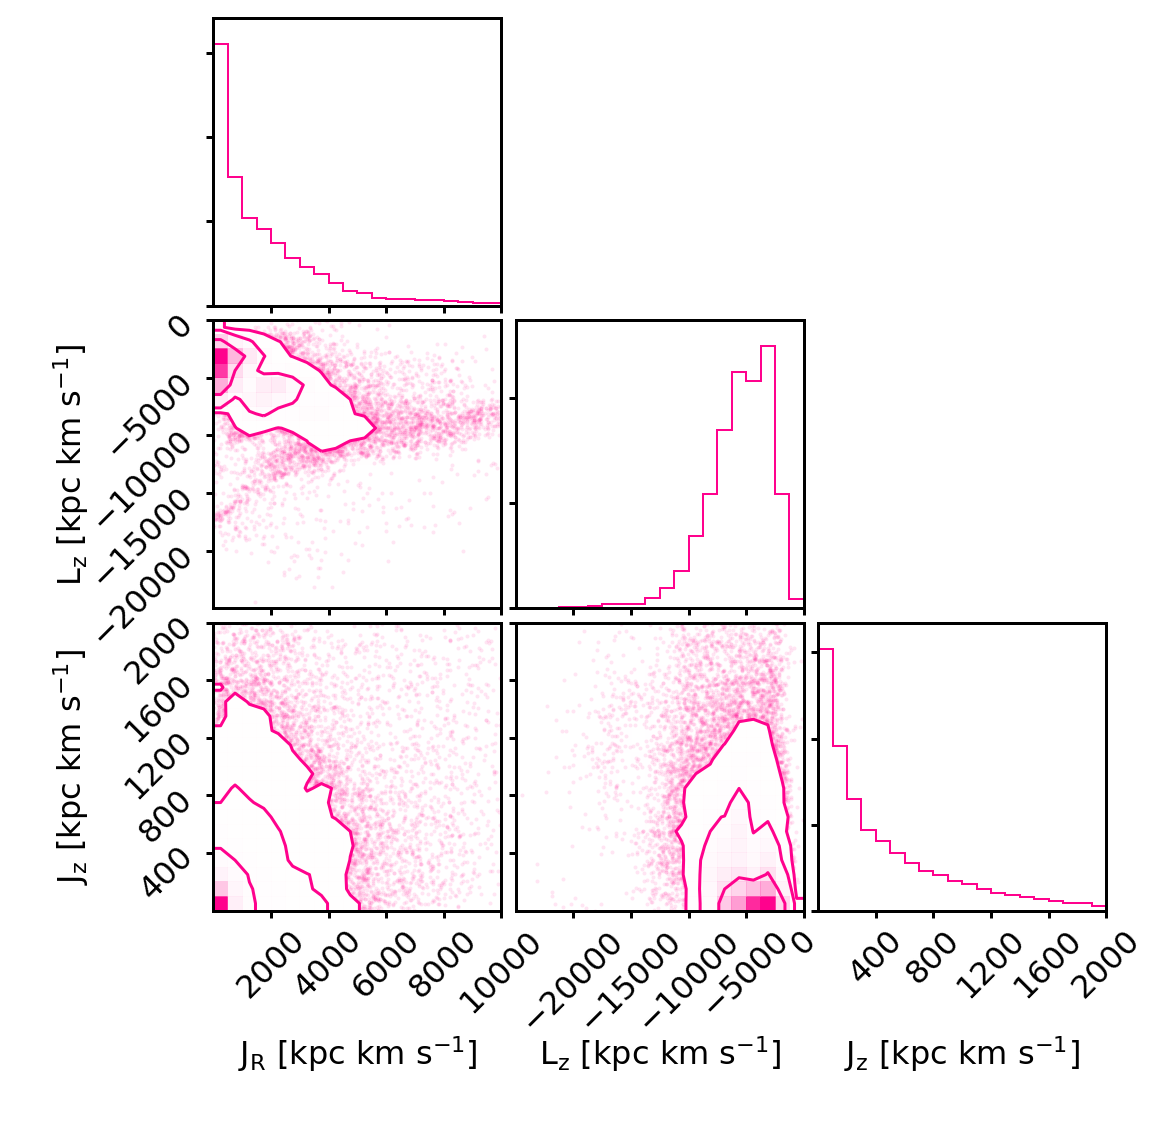

level   : 4
halo    : 24
snapnr  : 126
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1774142 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023996514081954957
redshift: 0.009521666967944764
time    : 0.99056814006128
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 1.0004838839599297.
14:45:14.743757
0
14:46:00.524159
1000
14:46:43.756127
2000
14:47:29.810532
3000
14:48:10.135568
4000
14:48:53.758854
5000
14:49:37.217687
6000
14:50:22.851514
7000
14:51:09.275949
8000
14:51:54.865780
9000
14:52:41.443013
10000
14:53:29.182014
11000
14:54:16.036973
12000
14:55:00.007532
13000
14:55:38.587271
14000
14:56:08.943694
15000
14:56:48.116416
16000
14:57:29.244740
17000
14:58:10.168445
18000
14:58:52.301595
19000
14:59:36.624701
20000
15:00:24.080469
21000
15:01:11.402188
22000
15:01:56.648419
23000
15:02:35.991320


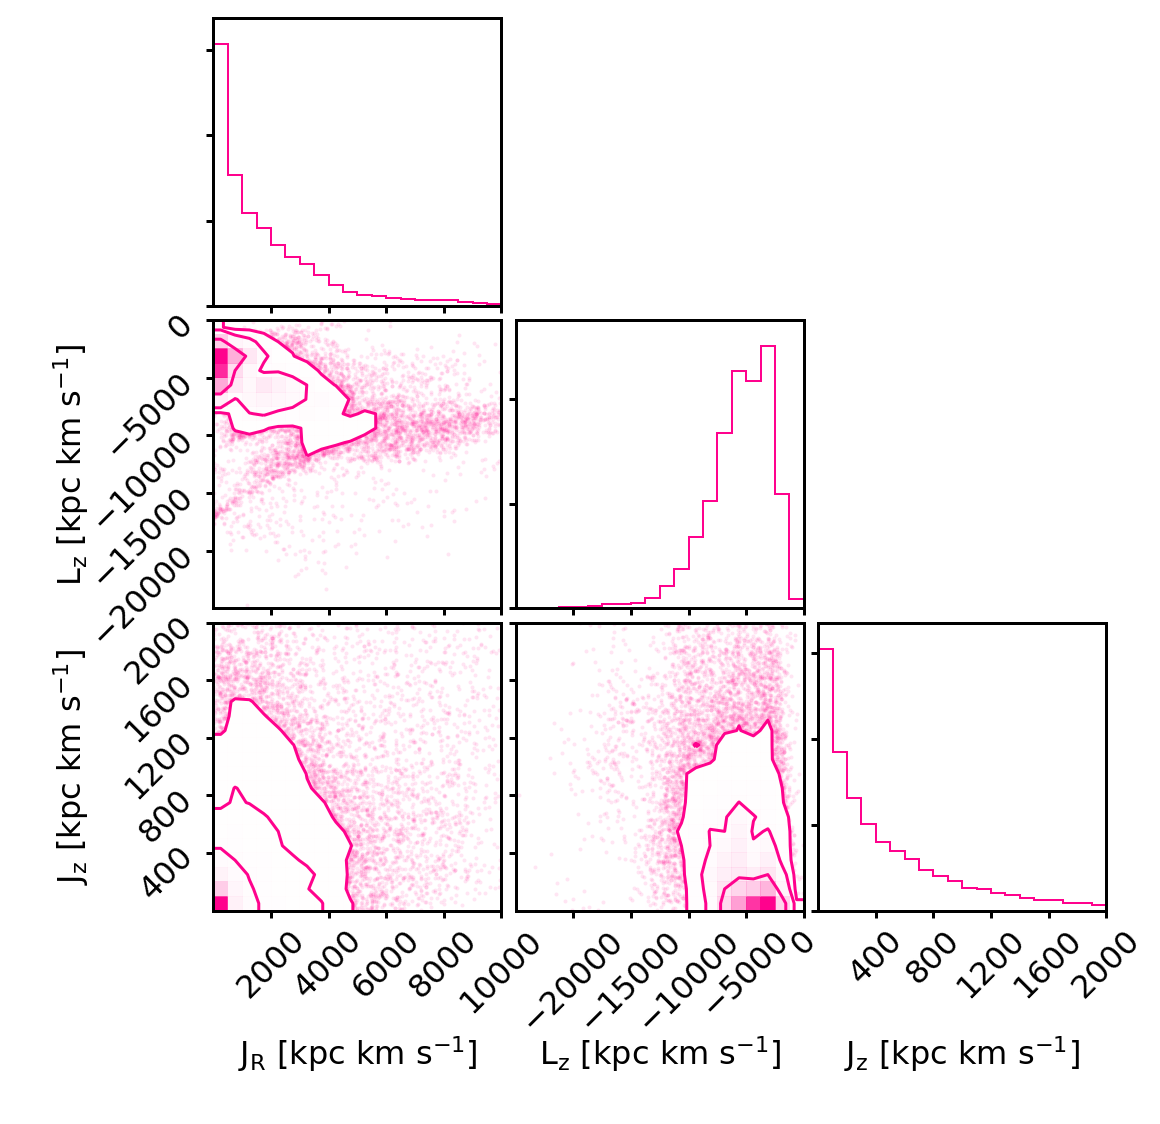

level   : 4
halo    : 24
snapnr  : 125
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1769475 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023806245625019075
redshift: 0.023974428382762536
time    : 0.9765868876036025
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9998653773018424.
15:03:53.547780
0
15:04:51.441358
1000
15:05:53.086901
2000
15:06:52.144140
3000
15:07:53.004223
4000
15:08:35.227147
5000
15:09:30.103071
6000
15:10:26.919392
7000
15:11:20.160628
8000
15:12:09.774883
9000
15:13:00.293631
10000
15:13:55.558052
11000
15:14:50.751767
12000
15:15:24.934114
13000
15:16:13.734354
14000
15:17:06.056225
15000
15:17:53.227949
16000
15:18:25.056344
17000
15:19:20.825926
18000
15:20:16.130106
19000
15:21:07.812986
20000
15:21:46.869496
21000
15:22:26.177406
22000
15:23:14.153586
23000
15:24:00.32948

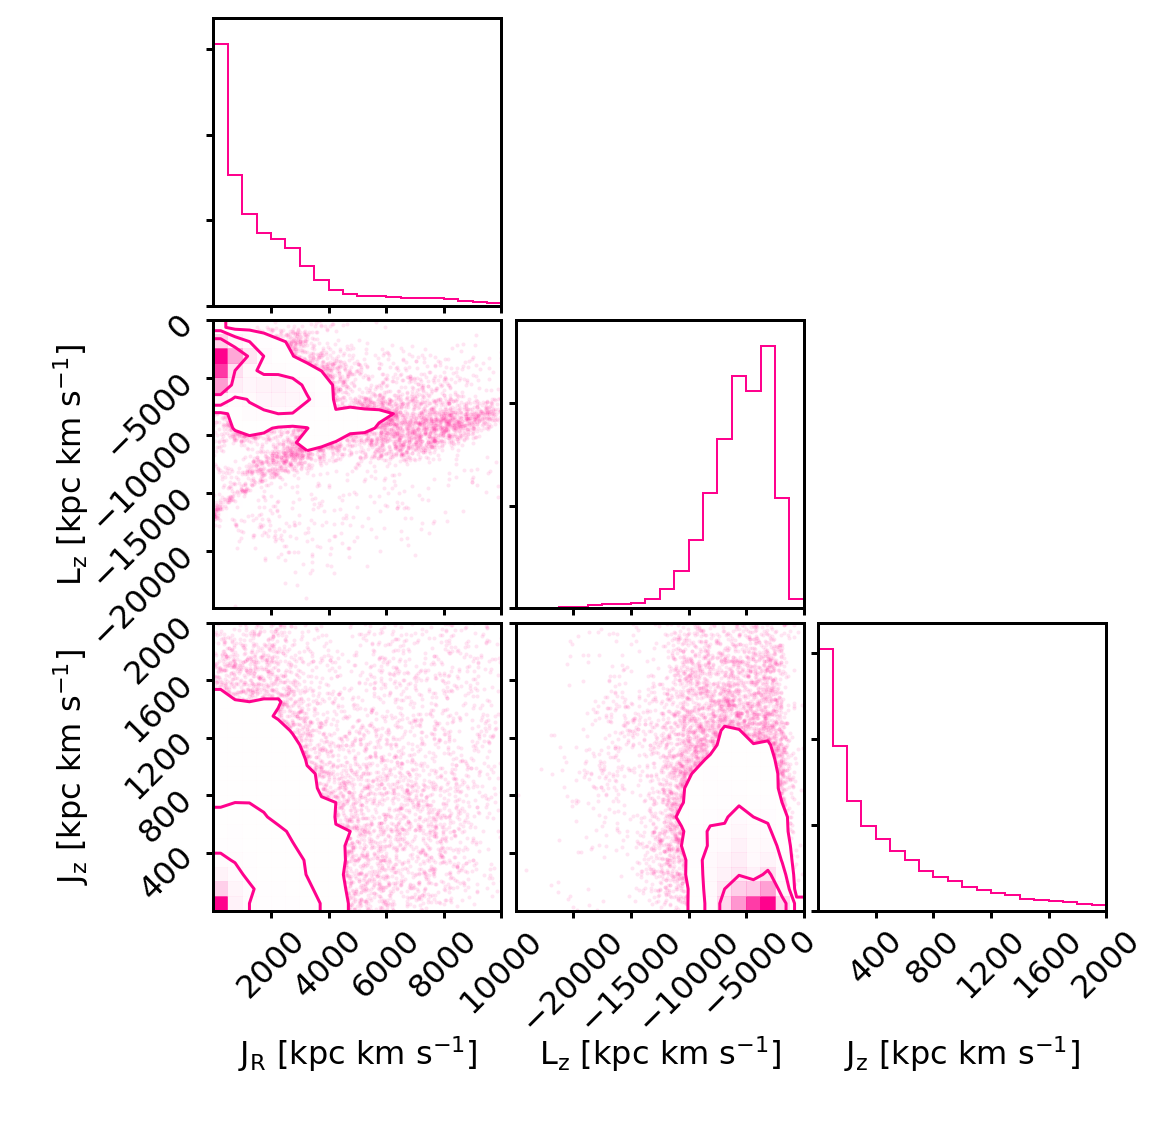

level   : 4
halo    : 24
snapnr  : 124
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1758643 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02354053109884262
redshift: 0.0337243718735154
time    : 0.9673758568617342
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9993893826829565.
15:25:14.858979
0
15:26:00.549609
1000
15:26:44.384126
2000
15:27:35.965089
3000
15:28:24.637090
4000
15:29:03.196267
5000
15:29:57.287915
6000
15:30:50.970955
7000
15:31:45.837317
8000
15:32:39.050554
9000
15:33:32.944036
10000
15:34:26.560681
11000
15:35:19.736782
12000
15:36:01.013127
13000
15:36:45.472277
14000
15:37:27.350193
15000
15:38:13.591782
16000
15:39:05.420595
17000
15:39:53.939233
18000
15:40:33.280285
19000
15:41:15.522347
20000
15:42:03.770917
21000
15:42:40.618095
22000
15:43:23.897480
23000
15:44:12.374953
2

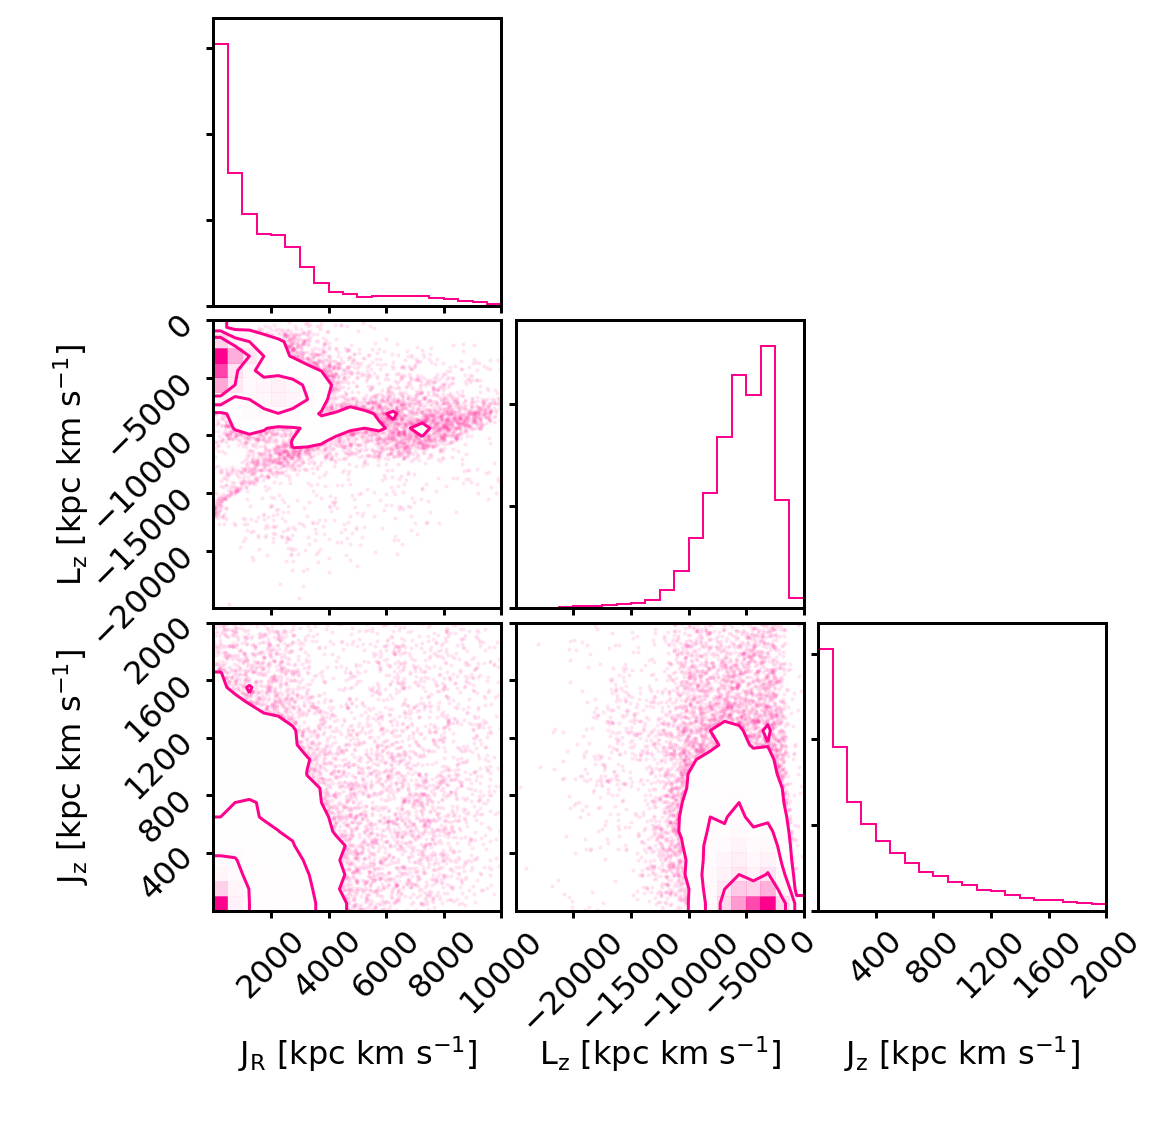

level   : 4
halo    : 24
snapnr  : 123
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1755878 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02335823625326157
redshift: 0.04852362998180593
time    : 0.9537219490392906
center  : [ 0.  0.  0.]

Number of GCs: 24793.
Sum of normalizations after fitting potential parameters: 0.9986476048290688.
15:45:27.753184
0
15:46:28.300012
1000
15:47:25.232148
2000
15:48:17.694729
3000
15:49:02.228087
4000
15:49:48.560395
5000
15:50:42.635638
6000


In [ ]:
level = 4

startnr = 60
endnr   = 128

colors = ['black', 'black', 'xkcd:hot pink', 'xkcd:indigo blue', 'xkcd:saffron']
 #2, 3, 4
zsignchange = [False, False, True]
excludedisk = [True, True, True]
for prognr in [2,3,4]:
    for jj in range(1):
        if zsignchange[jj]: 
            print("exclude particles which change signs while in disk radius")
            infilename = 'auriga/surviving_GC_zsignchange_IDs_prog{}.txt'.format(prognr)
        elif excludedisk[jj]:
            print('exclude particles which are in disk')
            infilename = 'auriga/surviving_GC_wodisk_IDs_prog{}.txt'.format(prognr)
        else:
            print('keep em all')
            infilename = 'auriga/surviving_GC_all_IDs_prog{}.txt'.format(prognr)

        IDs = np.loadtxt(filedir + infilename)
        progcolor = colors[prognr]

        for halo_number in [24]:  # range(1, 31):
            halodir = basedir+"halo_{0}/".format(halo_number)
            snappath = halodir+"output/"

            for snapnr in range(endnr-1, startnr-1, -1):
                i = snapnr - startnr

                print("level   : {0}".format(level))
                print("halo    : {0}".format(halo_number))
                print("snapnr  : {0}".format(snapnr))
                print("basedir : {0}".format(basedir))
                print("halodir : {0}".format(halodir))
                print("snappath: {0}\n".format(snappath))
                s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[4], 
                    haloid=0, galradfac=0.1, verbose=True) 

                # Clean negative and zero values of gmet to avoid RuntimeErrors
                # later on (e.g. dividing by zero)
                s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )

                if zsignchange[jj]: 
                    outfilename = 'actions/right_potential/progenitor{}/GCzsignchange_actions_snap_{}_jan19.txt'.format(prognr, snapnr)
                    outplot = 'actions/right_potential/progenitor{}/GCzsignchange_actions_snap_{}.png'.format(prognr, snapnr)
                elif excludedisk[jj]:
                    outfilename = 'actions/right_potential/progenitor{}/GCwodisk_actions_snap_{}_jan19.txt'.format(prognr, snapnr)
                    outplot = 'actions/right_potential/progenitor{}/GCwodisk_actions_snap_{}.png'.format(prognr, snapnr)
                else:
                    outfilename = 'actions/right_potential/progenitor{}/GCall_actions_snap_{}_jan19.txt'.format(prognr, snapnr)
                    outplot = 'actions/right_potential/progenitor{}/GCall_actions_snap_{}.png'.format(prognr, snapnr)

                gcmask = np.isin(s.id, IDs)
                print('Number of GCs: {}.'.format(np.sum(gcmask)))

                print('Sum of normalizations after fitting potential parameters: {}.'.format(np.sum([n_MND[i], n_NFWH[i], n_HB[i]])))

                pot_galpy = setup_galpy_potential(a_MND_kpc_all[i], b_MND_kpc_all[i], a_NFWH_kpc_all[i], a_HB_kpc_all[i], n_MND[i], n_NFWH[i], n_HB[i], R0_kpc_all[i])

                # this would mean that there are no merged GCs
                if np.sum(gcmask) == 0:
                    print("Skipped snap {} since there are no merged GCs.".format(snapnr))
                    #continue


                # get position and velocities of all selected GCs & convert to galpy units
                (R_kpc, phi_rad, z_kpc), (vR_kms, vphi_kms, vz_kms) = get_cylindrical_vectors(s, sf, gcmask)
                # convert physical to galpy units by dividing by REF vals (get velocities from best fit parameters)
                fix_v0_kms = v0_kms_all[i]
                fix_R0_kpc = R0_kpc_all[i]
                R_galpy, vR_galpy, vT_galpy, z_galpy, vz_galpy = R_kpc / fix_R0_kpc, vR_kms / fix_v0_kms, vphi_kms / fix_v0_kms, z_kpc / fix_R0_kpc, vz_kms / fix_v0_kms

                # estimate Delta of the Staeckel potential
                delta = 0.45
                delta = estimateDeltaStaeckel(pot_galpy, R_galpy, z_galpy)
                # CHECK HOW BIG INFLUENCE OF DELTA IS


                # set up the actionAngleStaeckel object
                aAS = actionAngleStaeckel(
                        pot   = pot_galpy,  # potential
                        delta = delta,      # focal length of confocal coordinate system
                        c     = True        # use C code (for speed)
                        )

                jR_galpy, lz_galpy, jz_galpy, r_kpc = np.zeros(len(IDs)), np.zeros(len(IDs)), np.zeros(len(IDs)), np.zeros(len(IDs))
                savedIDs = np.zeros(len(IDs))
                IDs_notworking = []
                for test_i, item in enumerate(IDs):
                    if (test_i % 1000) == 0:
                        print(datetime.datetime.now().time())
                        print(test_i)
                    try: 
                        jR_galpy[test_i], lz_galpy[test_i], jz_galpy[test_i] = aAS(R_galpy[test_i], vR_galpy[test_i], vT_galpy[test_i], z_galpy[test_i], vz_galpy[test_i])
                        r_kpc[test_i] = np.sqrt(R_kpc[test_i]**2 + z_kpc[test_i]**2)
                        savedIDs[test_i] = item
                    except(ValueError, UnboundError):
                        IDs_notworking.append(item)
                        continue

                print('Number of GCs w/o actions:', len(IDs_notworking))
                jR_kpckms, lz_kpckms, jz_kpckms = jR_galpy * fix_R0_kpc * fix_v0_kms, lz_galpy * fix_R0_kpc * fix_v0_kms, jz_galpy * fix_R0_kpc * fix_v0_kms

                # just pick result values of particles of which I actually could calculate actions
                survivor_id_mask = np.isin(IDs, savedIDs)
                survivor_IDs = IDs[survivor_id_mask]
                jR_kpckms, lz_kpckms, jz_kpckms = jR_kpckms[survivor_id_mask], lz_kpckms[survivor_id_mask], jz_kpckms[survivor_id_mask]
                r_kpc = r_kpc[survivor_id_mask]

                save_data = ([survivor_IDs, r_kpc, jR_kpckms, lz_kpckms, jz_kpckms])
                np.savetxt(filedir + outfilename, save_data)

                data = np.vstack([jR_kpckms, lz_kpckms, jz_kpckms])

                if prognr == 2:
                    actionrange = np.array([[0, 10000], [-25000,0], [0,2000]])
                else: actionrange = None
                print(actionrange)
                labels = ['\nJ$_\mathrm{R}$ [kpc km s$^{-1}$]\n', '\nL$_\mathrm{z}$ [kpc km s$^{-1}$]\n', '\nJ$_\mathrm{z}$ [kpc km s$^{-1}$]\n']
                figure = corner.corner(data.transpose(), labels = labels, plot_contours = 1, color = progcolor, range = actionrange, bbox_inches = 'tight')#, range =  [(0.,7500.), (-10000.,10000.),(0., 4000.)])
                figure.savefig(plotdir + outplot)
                plt.show()
                
                

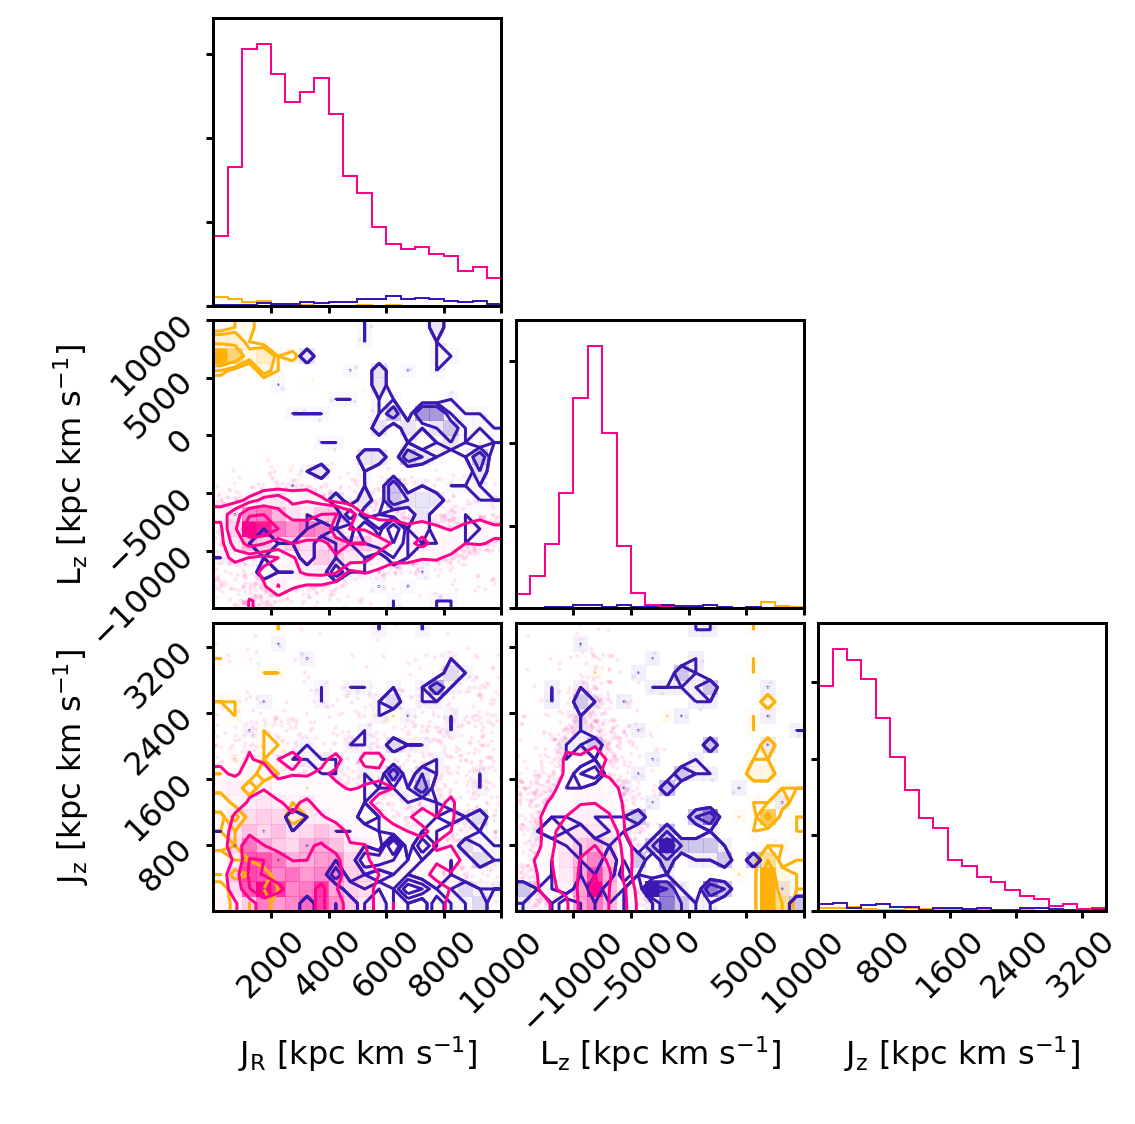

In [37]:
zsignchange = [True, False, False]
excludedisk = [True, True, False]

for jj in range(3):
    if zsignchange[jj]: 
        print("exclude particles which change signs while in disk radius")
        infilename = 'auriga/surviving_GC_zsignchange_IDs_prog{}.txt'.format(prognr)
        outfilename = 'actions/right_potential/progenitor{}/GCzsignchange_actions_snap_{}_jan19.txt'
    elif excludedisk[jj]:
        print('exclude particles which are in disk')
        infilename = 'auriga/surviving_GC_wodisk_IDs_prog{}.txt'.format(prognr)
        outfilename = 'actions/right_potential/progenitor{}/GCwodisk_actions_snap_{}_jan19.txt'
    else:
        print('keep em all')
        infilename = 'auriga/surviving_GC_all_IDs_prog{}.txt'.format(prognr)
        outfilename = 'actions/right_potential/progenitor{}/GCall_actions_snap_{}_jan19.txt'
counter = 0
colors = ['black', 'black', 'xkcd:hot pink', 'xkcd:indigo blue', 'xkcd:saffron']
labels = ['\nJ$_\mathrm{R}$ [kpc km s$^{-1}$]\n', '\nL$_\mathrm{z}$ [kpc km s$^{-1}$]\n', '\nJ$_\mathrm{z}$ [kpc km s$^{-1}$]\n']

actionrange = ([0., 10000.], [-15000., 10000.], [0., 3500.])
for prognr in [4,3,2]:
    progcolor = colors[prognr]
    survivor_IDs, r_kpc, jR_kpckms, lz_kpckms, jz_kpckms = np.loadtxt(filedir + 'actions/right_potential/progenitor{}/actions_snap_127_dec18.txt'.format(prognr))
    data = np.vstack([jR_kpckms, lz_kpckms, jz_kpckms])
    if counter == 0:
        figure = corner.corner(data.transpose(), labels = labels, plot_contours = 1, color = progcolor, bbox_inches = 'tight', range = actionrange) #range = actionrange, 
        counter += 1
    else:         
        figure = corner.corner(data.transpose(), labels = labels, plot_contours = 1, color = progcolor, bbox_inches = 'tight', fig = figure, range = actionrange) #range = actionrange, 
figure.savefig(plotdir + 'actions/right_potential/prog234_actions_snap_127.png')


In [ ]:
a